  ### Pyramid-ARIMA Demo

In [8]:
from pmdarima.arima import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

#### Loading Data

In [2]:
data = pd.read_csv('air_passengers_data.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Divide datasets into train and validation sets namely test, test1 and test2.
**test** posses last 30% of data and then divide it equally in **test1** and **test2**

In [3]:
train = data[:int(0.7*(len(data)))]
test = data[int(0.7*(len(data))):]
test1 = test[:int(0.5*(len(test)))]
test2 = test[int(0.5*(len(test))):]

### preprocessing (Making it univariate series as input)

In [4]:
train.drop('Month',axis=1,inplace=True)
test.drop('Month',axis=1,inplace=True)
test1.drop('Month',axis=1,inplace=True)
test2.drop('Month',axis=1,inplace=True)

/home/sameer/data_science_env/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Ploting the series

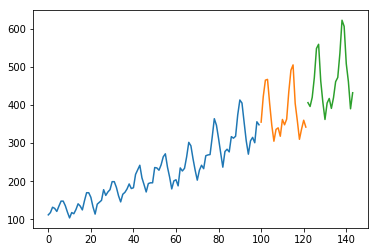

In [5]:
train['Passengers'].plot()
test1['Passengers'].plot()
test2['Passengers'].plot()

### Training data using auto_arima model
You have to just add parameters like seasonal if your data possess sesonality and set **m** value for how much period sesonality is occurs. The best model is selected by looking at the min values of [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) and [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion). For more information, Please refer the documentation. [auto_arima](https://www.alkaline-ml.com/pmdarima/tips_and_tricks.html)

In [6]:
model = auto_arima(train, trace=True, error_action='ignore',stepwise=True,seasonal=True, m=12, suppress_warnings=True)
model.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=646.567, BIC=666.294, Fit time=5.201 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=652.680, BIC=657.612, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=645.940, BIC=655.803, Fit time=0.829 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=646.447, BIC=656.311, Fit time=0.947 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=647.792, BIC=655.190, Fit time=0.175 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=647.914, BIC=660.244, Fit time=2.679 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=647.927, BIC=660.257, Fit time=1.388 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=646.264, BIC=661.059, Fit time=12.156 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=649.280, BIC=656.678, Fit time=0.625 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1,

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

### Predict the test dataset.

In [9]:
forecast_on_whole = model.predict(n_periods=len(test))
forecast_on_whole = pd.DataFrame(forecast_on_whole, index=test.index, columns=['Prediction'])
rms = sqrt(mean_squared_error(test,forecast_on_whole))
print(rms)

34.93631774317402


### Now plot the original values and also predicted value which is in forecast_on_whole dataframe

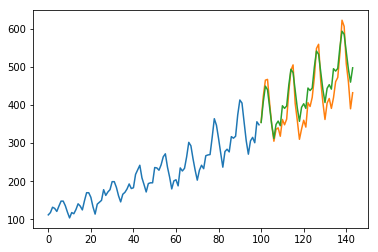

In [10]:
plt.plot(train, label='Train')
plt.plot(test, label='test')
plt.plot(forecast_on_whole, label='Prediction')
plt.show()

### Now predicting the test1 set before updating the model and creating prediction column for plotting and calculate RMSE

In [11]:
forecast_test1 = model.predict(n_periods=len(test1))
forecast_test1 = pd.DataFrame(forecast_test1, index=test1.index, columns=['Prediction'])
rms = sqrt(mean_squared_error(test1,forecast_test1))
print(rms)

29.857027946669287


### ploting test1 along with predictions

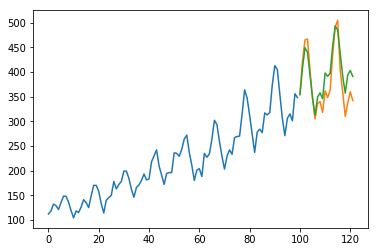

In [12]:
plt.plot(train, label='Train')
plt.plot(test1, label='test1')
plt.plot(forecast_test1, label='Prediction')
plt.show()

### Predicting test_2 without updating the model and calculating RMSE.

99.04595304248346


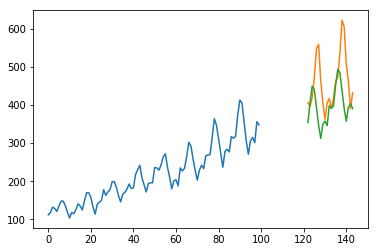

In [13]:
forecast_test2 = model.predict(n_periods=len(test2))
forecast_test2 = pd.DataFrame(forecast_test2, index=test2.index, columns=['Prediction'])
rms = sqrt(mean_squared_error(test2,forecast_test2))
print(rms)
plt.plot(train, label='Train')
plt.plot(test2, label='test1')
plt.plot(forecast_test2, label='Prediction')
plt.show()

## Update model by giving test1 data
For more information, Please refer the documentation [updating model](https://www.alkaline-ml.com/pmdarima/refreshing.html#updating-your-model-with-new-observations)

In [14]:
model.update(test1)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

### Now predicting the test1 again after updating test1 and calculating RMSE

In [15]:
forecast2_test1 = model.predict(n_periods=len(test1))
forecast2_test1 = pd.DataFrame(forecast2_test1, index=test1.index, columns=['Prediction'])
rms = sqrt(mean_squared_error(test1,forecast2_test1))
print(rms)

89.62774838066278


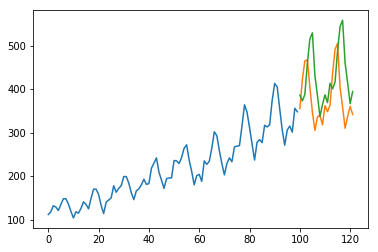

In [16]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test1, label='test1')
plt.plot(forecast2_test1, label='Prediction')

plt.show()

In [17]:
forecast2_test2 = model.predict(n_periods=len(test2))
forecast2_test2 = pd.DataFrame(forecast2_test2, index=test2.index, columns=['Prediction'])
rms = sqrt(mean_squared_error(test2,forecast2_test2))
print(rms)

38.77822454510718


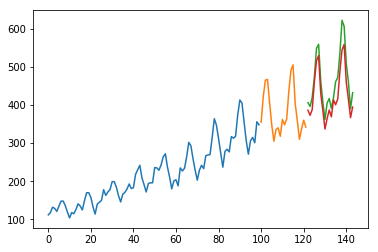

In [18]:
plt.plot(train, label='Train')
plt.plot(test1, label='test1')
plt.plot(test2, label='test2')
plt.plot(forecast2_test2, label='Prediction')

plt.show()

### Updating the model with test2 data

In [19]:
model.update(test2)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

#### Prediction and calulate **Mean square error** after updating the model with test2 data

In [20]:
forecast2_test2 = model.predict(n_periods=len(test2))
forecast2_test2 = pd.DataFrame(forecast2_test2, index=test2.index, columns=['Prediction'])
rms = sqrt(mean_squared_error(test2,forecast2_test2))
print(rms)

110.41620405897335


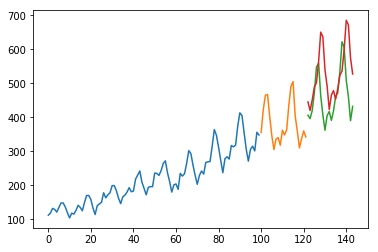

In [21]:
plt.plot(train, label='Train')
plt.plot(test1, label='test1')
plt.plot(test2, label='test2')
plt.plot(forecast2_test2, label='Prediction')

plt.show()